<a href="https://colab.research.google.com/github/Dreadwolf26/MLBeginnerNotesKindleBook/blob/main/Chapter_5_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5.1 Overview of the Scikit-Learn Library

**5.1.1 Organizational structure**

SciKit-Learn has a large assortment of modules within it to use for machine learning and the modules are appropriately named making it such a popular library for machine learning and its Free!

For example of the naming conventions. Say you are building a decision tree the module name would be **sklearn.tree** this is very intuitive. While classes for data preprocessing is **sklearn.preprocessing**.

The classes are also appropriately names as well for explain the class for building a linear regression model is **LinearRegression** while scaling for a dataset using standarization is called **StandardScaler**

Further reading for Scikit-Learn classes: https://scikit-learn.org/stable/modules/classes.html

The parameters sections lists the parameters that you can pass to a class constructor when instantiating and object.

The attributes section list the class attributes with is for storing model parameters.

In machine learning parameters can refer to the parameters of a method or parameters of a model.

Parameters of a method refer to the list of variables in a methods declaration. For instance the parameters section gives us a parameter of a class constructor (which is a special type of method)

Parameters of a model refer to the values learned (i.e calculated) by an algo during the training process. There parameters are stored in class attributes

The methods sections. This section lists methods available in the class. They are clickable on the webpage to get more detail.

**5.1.2 Estimators, Transformers, and Predictors**

sklearn follows and object oriented approach and is built around three main types of objects: estimators, transformers and predictors

All of the estimators have the **fit()**
method, transformers have the **transform()** mthod, and predictors have the **predict()** method

In sklearn's library almost all clases implement either the **fit()** method and either the **transform()** or **predict()** method.

The implementations for these emthods are different for different classes.

For instance implementation of **fit()** method in the **LinearRegression** class is entirely different from that of the **StandardScaler** class this is because the two methods perform very different tasks, even though they share the same name.

**Estimators and the fit() method**

An estimator refers to an object that learns(i.e estimates or calculates some parameters) from input data; this learning happens inside of the **fit()** method. And exmaple if the **fit()** method in the **StandardScaler** class. This class is for scaling the features in out dataset. its **fit()** method estimates the mean and variances of the features in the input dataset and stores the results in the mean_ and var_attributes respectively.

**Transformers and the trnansform() method**

Some estimators alos transform a dataset. These estimator are known as transformers ad perform the transformation inside a method called **transform()** This method accepts an array as input and uses the parameters calculated by the **fit()** method of the same object to return a transformed dataset.

As an illistration lets consider the **transform()** method in the **StandardScaler** class. The objective of scaling a dataset using the **StandardScaler** class is to **achieve a mean of 0 and a veriance of 1** This process is known as standardization and is necessary for some machine learning algorithms.

See finally the coding example from the book below

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame({'A':[1,2,3,2], 'B':[11,1,8,3]})
#Assigning StandardScaller class to scaler
scaler = StandardScaler()
#calling fit() here stores the values of mean_ and var_
scaler.fit(X)
#prints the mean of column A and B
print(scaler.mean_)
#prints the variance of column A and B
print(scaler.var_)

[2.   5.75]
[ 0.5    15.6875]


If we want to standardize a value manually we use the formula:

To standardize a value
x, subtract the mean (
μ) of the dataset from
x, and then divide by the standard deviation (
σ) of the dataset.

This calculation would of course become tedious if there are alot of values to transform that where the **transform()** method comes in to the **StandardScaler** class to do it for us

The **transform()** method scales the entire dataset using the mean and variances that were calculated by **fit()** and returns a transformed dataset as a NumPy array.

The code below uses the **transform()** method the Scale X and assign the transformed array to a variable called X-Scaled

In [ ]:
X_scaled = scaler.transform(X)
print(X_scaled)

[[-1.41421356  1.32550825]
 [ 0.         -1.19926937]
 [ 1.41421356  0.56807496]
 [ 0.         -0.69431384]]


This first column in this array gives us the standardized values of column A while the second gives standardized value of column B.

Both columns have a mean of 0 and a variance of 1. We can verify by using the **mean()** and **var()** methods below

In [ ]:
print(X_scaled[:,0].mean())
print(X_scaled[:,1].mean())
print(X_scaled[:,0].var())
print(X_scaled[:,].var())


0.0
0.0
0.9999999999999998
0.9999999999999999


**The fit_transform() method**

In code cell 1 we called the **fit()** and **transfrom()** methods seperately. Alternatively we can call the **fit_transform()** method. Using this method is the same as calling the **fit()** method first and then the **transform()** method after. the **fit_transform()** method however is more efficient and runs faster than calling the other two methods seperately.



**Predictors and the predict() method**

Some estimators are able to make predicitions when given a dataset. These estimators are known as predictors and perform the predictions using the method **predict()**

This method makes predictions based on the parameters calculated by the **fit()** method.

**For Example:**

The **preict()** method in the **LinearRegression** class uses the coefficient calculated by the **fit()** method of the same object to make predictions.

#5.2 Data Preprocessing with Scikit-Learn

Most of the time we will be preprocessing data before feeding them into the mchine algorithm.

**Data preprocessing tasks**

1. Handling missing data
2. Encoding text and categorical data
3. Feature scaling





In [ ]:
#datapreprocessing is DataFrames
import pandas as pd
import numpy as np
#Bring the CSV into a DataFrame
df = pd.read_csv("datapreprocessing.csv")
#Displaying the first few rows of the DF to look at
df.head()

,Color,Years,Strength,Height,Weight,Dangerous
0,Green,2.3,210.0,170.0,20 to 30 kg,Yes
1,Red,4.1,100.0,NaN,10 to 20 kg,No
2,Blue,1.4,NaN,412.0,0 to 10 kg,No
3,Green,NaN,313.0,123.0,10 to 20 kg,Yes
4,NaN,5.2,512.0,372.0,0 to 10 kg,Yes


**5.2.1 Handling Missing Data**

Most machine learninglagos demand and mandate a completed set of data because missing values would introduce Bias into the machine learning algorithm and create inaccuracies.

Missing values within a DataFrame as display as Nan the can be ride of by using the **dropna()** method. This works well if you have a very learge dataset and not alot of missing values, but if the dataset is smaller the best approach is to replace the value with statisctical measures.

The act of replacing missing values within a DataFrame with values of statistical measure is called data imputation.

To replace the missing values with the Dataframe we are currently working in see the code cell directly below this text.

**Explanation of the code**

First we import the SimpleImputer class.

Next we instantiate the SimpleImpter object called imp. Passing in two parameters: missing_vales and strategy to the constructor.

**missing_values**

This tells the imputer what to treat as missing values within the data set. Since we are working with pandas Dataframes it will be np.nan this is also the default for missing_values

**strategy**

This tells the imputer what strategy to use to replace the missing values.

The most commonly used values are:

1. mean
2. median
3. most_frequent

This is replace the values in the respective columns of course with which ever strategy that you have implemented.

**fit() method**

Passing in just the column names with the missing values. This method expects a 2D array this is why there are double brackets [[]] around the array and calculates the value placed in stratgey. It then stores the information in the statistics_ variable of the SimpleImputer instantiation **imp**

**Transforming the data**

You then must call the df for the columns again as a 2D array and then assign the value **imp.transform(df[['Years', 'Strength', 'Height']])** for the information to be transformed and replaced with the **strategy** value that was set in place for it.

In [ ]:
from sklearn.impute import SimpleImputer

#creating the SimpleImputer object
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#calling the fit() method to calc the means
imp.fit(df[['Years', 'Strength', 'Height']])

#transforming the data
df[['Years', 'Strength', 'Height']] = imp.transform(df[['Years', 'Strength', 'Height']])

df.head()

,Color,Years,Strength,Height,Weight,Dangerous
0,Green,2.30,210.00,170.00,20 to 30 kg,Yes
1,Red,4.10,100.00,269.25,10 to 20 kg,No
2,Blue,1.40,283.75,412.00,0 to 10 kg,No
3,Green,3.25,313.00,123.00,10 to 20 kg,Yes
4,NaN,5.20,512.00,372.00,0 to 10 kg,Yes


**attempting the below on my own**

Mistakes I made:

1. I called the SimpleImputer object again when I should have used set_params as listed below
2. When transforming the data I forgot to set df to the coolor attribute.

These were easy to fix after reading the output except for number 1 I had to look in the book.

In [ ]:
#filling missing data in the colors column self done
imp.set_params(strategy='most_frequent')
#fit the data structure for statstical analysis
imp.fit(df[['Color']])

#transforming the color column
df[['Color']] = imp.transform(df[['Color']])

df.head()

,Color,Years,Strength,Height,Weight,Dangerous
0,Green,2.30,210.00,170.00,20 to 30 kg,Yes
1,Red,4.10,100.00,269.25,10 to 20 kg,No
2,Blue,1.40,283.75,412.00,0 to 10 kg,No
3,Green,3.25,313.00,123.00,10 to 20 kg,Yes
4,Green,5.20,512.00,372.00,0 to 10 kg,Yes


**Final thoughts on this section**

This section was not too terrbile to work through I did not have a direct understanding of any of it and spent well over an hour tryiong to figure out what they mean and now everything makes sense.

One important thing to note in the book that:

**Machine learning data is seperated into training data and test data you will use the fit_transform() method on the training set and transform() only on the test set. This is done because the test data should mimic new information that is being brought into the algo like it would in a real enviroment**

**5.2.2 Encoding**

**Categorical Data**

When working in machine learnign sometimes data coming in is not going to be numerical data it will be categorical. For example: Color, weight, and dangerous in our current dataset datapreprocessing.csv.

Only a small subset of machine learning algos can handle non numerical categorical data. We need to convert this text based data into numerical data before passing them to our algos.

**ways to transform categorical data into numerical data**

1. You can convert each categorical text to a number.
  1. We will use the Weight column as an example: We can assign a running sequence of numbers to the category( such as 0 for '0-10kg' and 1 for '10-20kg' and so on. To do this we can use the **OrdinalEncoder** or the **LabelEncoder** class. These too classes are very similiar in nature, but there are some differences.


**LabelEncoder class**

Is well designed to work with labels. Therefore, the **fit()** methos of the **LabelEncoder** class expects a 1D array (only one bracket)



In [ ]:
from sklearn.preprocessing import LabelEncoder

#Assigning the class to a variable for ease of use
le = LabelEncoder()
#encoding the text data to numerical
df['Dangerous'] = le.fit_transform(df['Dangerous'])
#displaying the data to be sure it displays correctly
df.head()

,Color,Years,Strength,Height,Weight,Dangerous
0,Green,2.30,210.00,170.00,20 to 30 kg,1
1,Red,4.10,100.00,269.25,10 to 20 kg,0
2,Blue,1.40,283.75,412.00,0 to 10 kg,0
3,Green,3.25,313.00,123.00,10 to 20 kg,1
4,Green,5.20,512.00,372.00,0 to 10 kg,1


**OrdinalEncoder**

The default encoding for the **ORdinalEncoder** is np.float64 which will give us a float number. IF we want the information to display as an intger and not a float we need to pass in a data type parameter dtype = np.int64 for a 64 bit integer.

In [ ]:
#encoding weight with the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
#assigning a class to a variable
oe = OrdinalEncoder(dtype=np.int64)
#Specifiying the DataFrame and assigning it to fit_transform.
df[['Weight']] = oe.fit_transform(df[['Weight']])
#Displaying the data to visually inspect
df.head()

,Color,Years,Strength,Height,Weight,Dangerous
0,Green,2.30,210.00,170.00,2,1
1,Red,4.10,100.00,269.25,1,0
2,Blue,1.40,283.75,412.00,0,0
3,Green,3.25,313.00,123.00,1,1
4,Green,5.20,512.00,372.00,0,1


One problem with using such a simple approach as mentiuoned above is that it suggests a relationship between the categories that may not exsit in relatiry.

For instance the DataFram category **Color** has the values **'Green','Red' and 'Blue'** The **OrdinalEncoder** class encodes categories in alphabetical order so Blue = 0 Green = 1 and Red = 2. The Machine learning Alogo could easily misinterpret these numbers suggesting that Blue is smaller than Red drawing invlaid conclusions. Therefore encoding non-ordinal features (Features where the order doesnt matter) using the **OrdinalEncoder** is not ideal.

A common practice to encode these values is to use hot-encoding for these values where each value is converted to a new column and assigned a value of 0 or 1.

To do hot-encoding we will use sklearn with the **OneHotEncoder** class from the sklearn preprocessing module.

**OneHotEncoder**

Within the documentation you will see that there is a parametere that is used called **sparse** its default value is true. This means that the **OneHotEncoder** will return a Sparse matrix by default. A sparse matrix consists of very few non-zero elements:

[[0,0,0,4,0],[0,1,0,0,0]]

The above is a sparse matrixas it only has 2 non-zero elements within it. storing this as a REGULAR 2d ARRAY IS A WASTE OF SPACE since most elements are 0. sklearn will then compress the matrix into a special data structure that only stores non-zero values.

Most methods in sklearn will take in this sparse structure as input. However if you want to work with regular 2D arrays then you will need to pass in the parameters sparse = False into the **OneHotEncoder()** class.

When that is done then the **fir_transform()** method will return a NumPy Array

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder Example
# Create an instance of OneHotEncoder with specific configurations:
# - Use 64-bit integers for the output data type.
# - Return a dense array instead of a sparse matrix.
# - Drop the first category in each feature to avoid multicollinearity.
ohe = OneHotEncoder(dtype=np.int64, sparse=False, drop='first')

# Fit the encoder to the 'Color' column of df and transform the data,
# effectively converting categorical color data into numerical format.
color_encoded = ohe.fit_transform(df[['Color']])

# Retrieve the names of the features generated by the encoder, providing a base name 'Color'
# for more descriptive column naming.
columns = ohe.get_feature_names_out(['Color'])

# Create a new DataFrame from the encoded data with the proper column names.
df2 = pd.DataFrame(color_encoded, columns=columns)

# Concatenate the original DataFrame 'df' with the new DataFrame 'df2' containing the encoded columns,
# ensuring that the operation is performed column-wise (axis=1).
df = pd.concat((df, df2), axis=1)

# Display the first few rows of the updated DataFrame to verify the changes.
print(df.head())


   Color  Years  Strength  Height  Weight  Dangerous  Color_Green  Color_Red
0  Green   2.30    210.00  170.00       2          1            1          0
1    Red   4.10    100.00  269.25       1          0            0          1
2   Blue   1.40    283.75  412.00       0          0            0          0
3  Green   3.25    313.00  123.00       1          1            1          0
4  Green   5.20    512.00  372.00       0          1            1          0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**5.2.3 Feature Scaling**

Feature scaling is a technique for calibrating the range of features in a dataset. This ensures that features do not have vastly different scales and prevents features with large values from dominating the results of our algos.

Some ML algos use the Eluchidean distance between instances to estimate parameters. if one feature has a range of 0 to 10,000 while another has a rnage of 0 to 5 the feature with the larger values will dominant the distance calculation.

**scenario**

A = 8080
B = 8000

(These will be denoted as p and q in the formula below.)

and the values for the second feature follow the same A and B respective

- 2

- 1

 (These are denoted as r and s)
 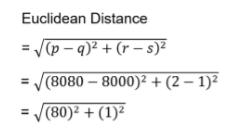

 Even though the values for the second feature differs by 100% the difference does not contribute much to the distance. In contrast the values of the first feature with a difference of only 1% contribute much more to it. the bias occurs because the first feature has larger values.

 To prevent such bias we can scale both features. There is two was to do this **normalization** and **standardization**

 **normalization**

 scales a features to values between 0 and 1 inclusive using the formula:

 x_normalized=(x-x_min)/(x_max-x_min)

 Where x_max and x_min are the maximum and the minimum values for the of the feature.

 **Standardization**

 Scales in such a way that the mean becomes 0 and the variance becomes 1. Just like the **transform()** method

 The decision to normalize or standardize our dataset depends on the specifics of the problem. **normalization** tends to be effected by outliers (extreme values) since it computation using the minimum and maximum values of the features. **Standardization** does not bound values to a specific range. This can of course cause problems for some machine learning algos that expect a specific input range. For instanance nueral networks expect an input range of 0 to 1.

 **YOU CAN ALWAYS TRAIN WITH ALL THREE DATASETS (RAW, NORMALIZED, AND STANDARDIZED)**

In [ ]:
#performing normalization

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
#transforming the data for normalization required for ML
df[['Years', 'Strength', 'Height']] = mms.fit_transform(df[['Years', 'Strength', 'Height']])

df

,Color,Years,Strength,Height,Weight,Dangerous,Color_Green,Color_Red
0,Green,0.236842,0.266990,0.162630,2,1,1,0
1,Red,0.710526,0.000000,0.506055,1,0,0,1
2,Blue,0.000000,0.445995,1.000000,0,0,0,0
3,Green,0.486842,0.516990,0.000000,1,1,1,0
4,Green,1.000000,1.000000,0.861592,0,1,1,0


# 5.3 Pipeline and ColumnTransformer

In previous sections we have used **fit_transform()** methods of different classes seperately this would of course be extremely tedious and redundant code that would not be needed. There is an easier way to do this we can use pipelines and columntransformers.

**5.3.1 Pipeline**

A **pipeline** allows us to chain different machine learning tasks by combining multiple estimators into a composite estimator. For instance we can use a pipeline to chain a **SimpleImuter** estimator with a **MinMaxScaler** estimator (any object with a **fit()** method is an estimator.

All but the last estimator in the pipeline must have a **transform()** method (They must also be transformers) while the last estimator will only need the **fit()** method



In [ ]:
from sklearn.pipeline import Pipeline  # Importing the Pipeline class from scikit-learn

# Sample data with one feature column 'A', which includes some missing values (np.nan)
data = pd.DataFrame([[1], [4], [np.nan], [8], [11]], columns=["A"])

# Creating a pipeline object named 'pl'. The pipeline consists of two steps:
# 1. 'imp': A SimpleImputer step to handle missing values by replacing them with the mean of the column.
# 2. 'scaler': A MinMaxScaler step to scale the numerical data to a default range 0 to 1.
#these are arranged by order of task
pl = Pipeline([
    ('imp', SimpleImputer(strategy='mean')),  # Imputation transformer for completing missing values.
    ('scaler', MinMaxScaler())                # Scaling features to a given range.
])

# Fitting the pipeline to the data and transforming the data in one step.
# This will apply mean imputation followed by min-max scaling to the data.
transformed_data = pl.fit_transform(data)

# Printing the transformed data to see the effects of the pipeline processing.
print(transformed_data)


[[0. ]
 [0.3]
 [0.5]
 [0.7]
 [1. ]]


**Columntransformer**

A colun transformer is similiar to a pipelin except it is only for data transformation. Therefore all estimators in a column transformer must have the **transform()** method

I addition the column transformer does not pass the output as the input to the next class. Instead it concatenates the results of the method calls and transforms the dataset

In [ ]:
from sklearn.compose import ColumnTransformer

# Correctly defining the DataFrame with 'columns' as a list
data = pd.DataFrame([[1], [4], [np.nan], [8], [11]], columns=['A'])

# Correctly defining the ColumnTransformer
# Notice the structure of tuples for each transformer step
# Each transformer is applied to the specified list of columns
ct = ColumnTransformer([
    ('imp', SimpleImputer(strategy='mean'), ['A']), # Imputer applied to column 'A'
    ('scaler', MinMaxScaler(), ['A'])               # Scaler applied to column 'A'
])

# To demonstrate, let's fit and transform the data
transformed_data = ct.fit_transform(data)

print(transformed_data)

[[ 1.   0. ]
 [ 4.   0.3]
 [ 6.   nan]
 [ 8.   0.7]
 [11.   1. ]]


**Detail explanation of the above code**

First we import **ColumnTransformer**

Then we use the previously used dataframe

Then we instantiate the **ColumnTransformer()** constructor accepts a list of transformers as input. Transformer is represented as a name, transformer and then specifying the column. You can see the set up so you have the string name, method and any parameters within its parentheses, then the column(s) in a list.

The **ColumnTransformer** method is close to the same as **PipeLine** The biggest difference is **Pipeline** calls a method and then uses that output and input for the next method and returns an array in one column. **ColumnTransformer** performs two method calls independently and returns the array with two columns.


In [ ]:
#creating DataFrame
data = pd.DataFrame({'A':[1,2,3,4,5],
                     'B':['Apple', 'Orange', 'Apple', 'Banana', 'Apple'],
                     'C':[11,12,13,14,15]})
#calling columntransformer and transformer methods
ct2 = ColumnTransformer([('encode', OrdinalEncoder(), ['B']),
 ('normalize', MinMaxScaler(),['A'])],
                        remainder='passthrough')
#printing data for review
print(ct2.fit_transform(data))

[[ 0.    0.   11.  ]
 [ 2.    0.25 12.  ]
 [ 0.    0.5  13.  ]
 [ 1.    0.75 14.  ]
 [ 0.    1.   15.  ]]


We created a DataFrame with three columns A,B and C next we pass in a list of tuples into the **ColumnTransformer()** constructor specifying which colun for which transformer.

Note on the **remainder='passthrough'** parameter at the end. By default only columns specified in the list of tuples are transformed and then displayed when using the **remainder='passthrough'** however this will display the untransformed columns.

The order of the columns will be their order in the list of transformers, so B, A and then C.

# 5.4 Model Evaluation with SciKit-Learn


Model evaluation is an essential part of machine learning projects it is for evaluating how well your model runs.

**Supervised Machine Learning**

Is typically involves comparing the results predicted by our model with the actual labels in our dataset.

The following section will discuss freq used metrics for eveluating classification and regression models.

**Classification Models**

Predits labels with Discrete Values i.e 'Dog", 'Cat', and 'Bird'

**Regression Models**
predict labels with continous values i.e 1.32, 52.1 and 21.1



**5.4.1 Classifications metrics**

Commonly used metrics for classification:

- Accuracy
- Precesion
- Recall

**Accuracy**

Accuracy refers to the fraction of instances predicted correctly by our model. it ranges from 0 to 1. 1 being 100%

To Calculate accuracy we use the **accuracy_score()** function in **sklearn.metrics** module. This function requires us to pass the True labels first followed by the predicted labels.

See example below:

In [ ]:
from sklearn.metrics import accuracy_score

#true labels
true = ['Cat', 'Cat', 'Dog','Dog', 'Cat', 'Dog']
#Predicted labels
pred = ['Cat','Cat','Cat','Dog','Cat','Cat']
#passing in accuracy_score with params to variable score
score = accuracy_score(true,pred)
#Displaying thee score
print(score)

0.6666666666666666


**Precision and Recall**

Classification accuracy is very easy to calculate and interpret. However one issue with this score is that it can be misleading if we imbalance the data.

Imagine if we had a dataset with 95 dogs and 5 cats if the models guesses all dogs it will be .95 (95%) accurate

To be able to understand **Precision and Recall** we need to know about the confusion matrix. We are referring to the two list in the code cell above true and pred.

See the confusion matrix below:

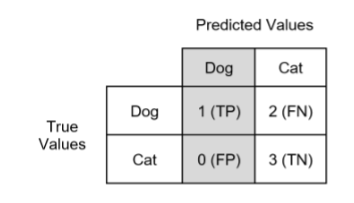

There are four terms to understand the confusion matris

- true positive (TP)
- true negative (TN)
- false positive (FP)
- false negative (FN)

These terms are defined on the predicted values.

**TP and TN**

In our example above suppose we consider. 'Dog' as positive and 'Cat' as negative.

If an instance is predicted as 'Positive'refer to gray highlighted column. IT will either be TP or FP outcome.

The number of TP and FP outcomes in our example are 1 and 0 respectively mean 1 instance positively predicted 'Dog' so 1 was predicted correctly and 0 predicted incorrectly.

**FN and TN**

If an instance is predicted as negative it can either be FN or TN. FN is when and outsome is incorrectly predicted as negative and TN is when an outcome is correctly predicted as negative.

FP and FN are of course undesireable outcomes for the model which value to minimize really depends on our model objective.

IF we are devloping a model to predict the presence of a malignant tumor (Negative would indicate the absence of the tumor) we would want to minimize FN outcomes

If we are developing a model for invesment we would want the FP outcomes to be minimized.

TF,FP, and FN are used in the calculations of precision and recall.

**Precision** is defined by this formula

Precision = TP/(TP+FP)

**Recall**

Measures the percentage accuracy of our classifier when the true value of an instance is positive.

Formula:

Recall = TP/(TP+FN)

See exmaple code below of using **Precision and Recall**

In [ ]:
from sklearn.metrics import precision_score, recall_score

true = ['Cat', 'Cat', 'Dog','Dog', 'Cat', 'Dog']
#Predicted labels
pred = ['Cat','Cat','Cat','Dog','Cat','Cat']
#checking precision between the two list pos_label is indicating of what we want totest as positive
precision = precision_score(true,pred, pos_label = 'Dog')
#Calculating recall (TP rate)
recall = recall_score(true,pred, pos_label = 'Dog')

print(precision)
print(recall)

1.0
0.3333333333333333


**5.4.2 Regression Metrics**

Metrics for evaluating regression models

**Common Metrics**

- Root Mean Squared Error
- R-sqaured

**Root Mean Squared Error (RMSE)**

Is the square root of the Mean Squared Error (MSE)

MSE is calculated by the mean of the squared differences between the true and predicted values.

Suppose we have two lists of values:

pred = [2.1, 1.4, 5.6, 7.9]

true = [2.5, 1.6 ,5.1, 6.8]

We then calculate the differences between them.

differences = [-0.4,-0.2,0.5,1.1]

You then square the differences.

squares = [0.16,0.04,0.25,1.21]

Then calculate the mean

mean = (0.16+0.04+0.25+1.21)/4 = 0.415

Thew value 0.415 gives us the MSE value

To get the RMSE value we then take the the square root of MSE.

RMSE = square root of 0.415 = 0.644

Rule of thumb the lower the RMSE the better.

This forces our model to focus on reducing large errors. Since the RMSE take evn small errors and amplifies them.

**R-squared**

Is another popular regression metric. This score measures how much of the variance in the target variable can be explained by our model.

The equation for the R-squared is below:

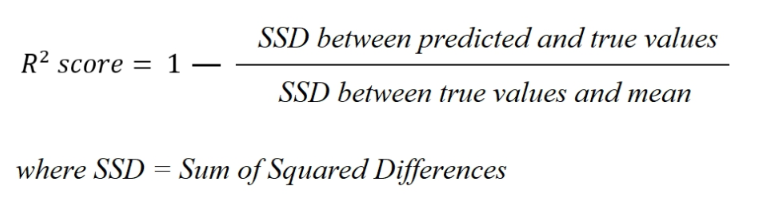

Illustarated example:


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
pred = [2.1, 1.4, 5.6, 7.9]

true = [2.5, 1.6 ,5.1, 6.8]
#This function will give MSE as default the squared=False is what gives us the RMSE
RMSE = mean_squared_error(true,pred, squared=False)
#Calculates the r2 score
r2 = r2_score(true,pred)

print(RMSE)
print(r2)



0.6442049363362565
0.902696365767878


# 5.5 Model selection with Scikit-Learn

Thoe above section discussed various metrics for model evaluation. When working on a machine learning project, we commonly build more than one machine learning model and use the metrics above to select the best performing model.

**5.5.1 Train Test Split**

This approcah would be splitting the data into a training set and into a subeset of test sets and train different models using the training set and select the best performing model. Then the model can be further evaluated against data that is not within the test data.

To split the training and test subsets, we can use **train_test_split()** function in **sklearn.model_selection** module. This function accepts one or more arrays as input and splits the array(s) into training and test subsets. After splitting it returns two or more arrays containing the train-test split of the input array(s).

See code example below:

In [ ]:
from sklearn.model_selection import train_test_split

X = [1,2,3,4,5,6,7,8,9,10]
y = [23,11,31,45,12,65,43,69,13,12]

#splitting the data and assigning it to variable tts for printing
tts = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#using a for loop to print the data lenght to confirm it matches.
for i, data in enumerate(tts):
  print(f'Length of tts[{i}]', len(data))

print(tts)

Length of tts[0] 8
Length of tts[1] 2
Length of tts[2] 8
Length of tts[3] 2
[[6, 1, 8, 3, 10, 5, 4, 7], [9, 2], [65, 23, 69, 31, 12, 12, 45, 43], [13, 11]]


**5.5.2 k-Fold Cross-Validation**

k-fold cross validation involves splitting our data set into k-subsets, known as k-folds. Out of the k-folds, k-1 of them are used as training data while the remaining fold is used for validation.

The algorithm is trained and tested k times. Each time using a new fold as the validation set. Finally the result of the cross-validation process is the average of the results obtained on each run.

To do cross-validation we train a model on:

- Train model on folds 1 and 2, evaluate on fold 3.
- Train model on folds 2 and 3, evaluate on fold 1.
- Train model on folds 1 and 3, evaluate on fold 2.


Each eval will then give us a score we then find the mean of the scores and make it the final score.

If we have a large dataset we can combine **k-fold cross-validation** with a **train-test splie** to do that we first split our dataset into training and test subsets, Next we would split the training subset further into k-folds and perform cross-validation on these folds to select the best model. The selected model is the evaluated on the test set to determine if it generalizes well to unseen data.

The code below takes the datasets and splits them into folds and training and test sets for each fold:

In [ ]:
from sklearn.model_selection import KFold


X = [1,2,3,4,5,6,7,8,9,10]
y = [23,11,31,45,12,65,43,69,13,12]

# Specify the number of folds (k)
k = 3

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate through the splits
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train = [X[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    y_train = [y[i] for i in train_indices]
    y_test = [y[i] for i in test_indices]

    print(f"Fold {fold+1}:")
    print("Train indices:", train_indices)
    print("Test indices:", test_indices)
    print("X_train:", X_train)
    print("X_test:", X_test)
    print("y_train:", y_train)
    print("y_test:", y_test)
    print()


Fold 1:
Train indices: [2 3 4 6 7 9]
Test indices: [0 1 5 8]
X_train: [3, 4, 5, 7, 8, 10]
X_test: [1, 2, 6, 9]
y_train: [31, 45, 12, 43, 69, 12]
y_test: [23, 11, 65, 13]

Fold 2:
Train indices: [0 1 3 4 5 6 8]
Test indices: [2 7 9]
X_train: [1, 2, 4, 5, 6, 7, 9]
X_test: [3, 8, 10]
y_train: [23, 11, 45, 12, 65, 43, 13]
y_test: [31, 69, 12]

Fold 3:
Train indices: [0 1 2 5 7 8 9]
Test indices: [3 4 6]
X_train: [1, 2, 3, 6, 8, 9, 10]
X_test: [4, 5, 7]
y_train: [23, 11, 31, 65, 69, 13, 12]
y_test: [45, 12, 43]

